# Data Loading and Initial Exploration

This section focuses on loading the breast cancer dataset and performing initial data exploration to understand its structure and characteristics.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import pickle
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

## **Data Loading**
### Loading the Breast Cancer Wisconsin Diagnostic dataset using pandas.

In [2]:
# Loading dataset
df = pd.read_csv("breast_cancer_wisconsin_diagnostic.csv")

In [3]:
df.head()

,Unnamed: 0,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0


## **Data Cleaning and Preprocessing**
### Handling missing values, outliers, and duplicate data to ensure data quality.
### Converting categorical features into numerical representation for model compatibility.

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

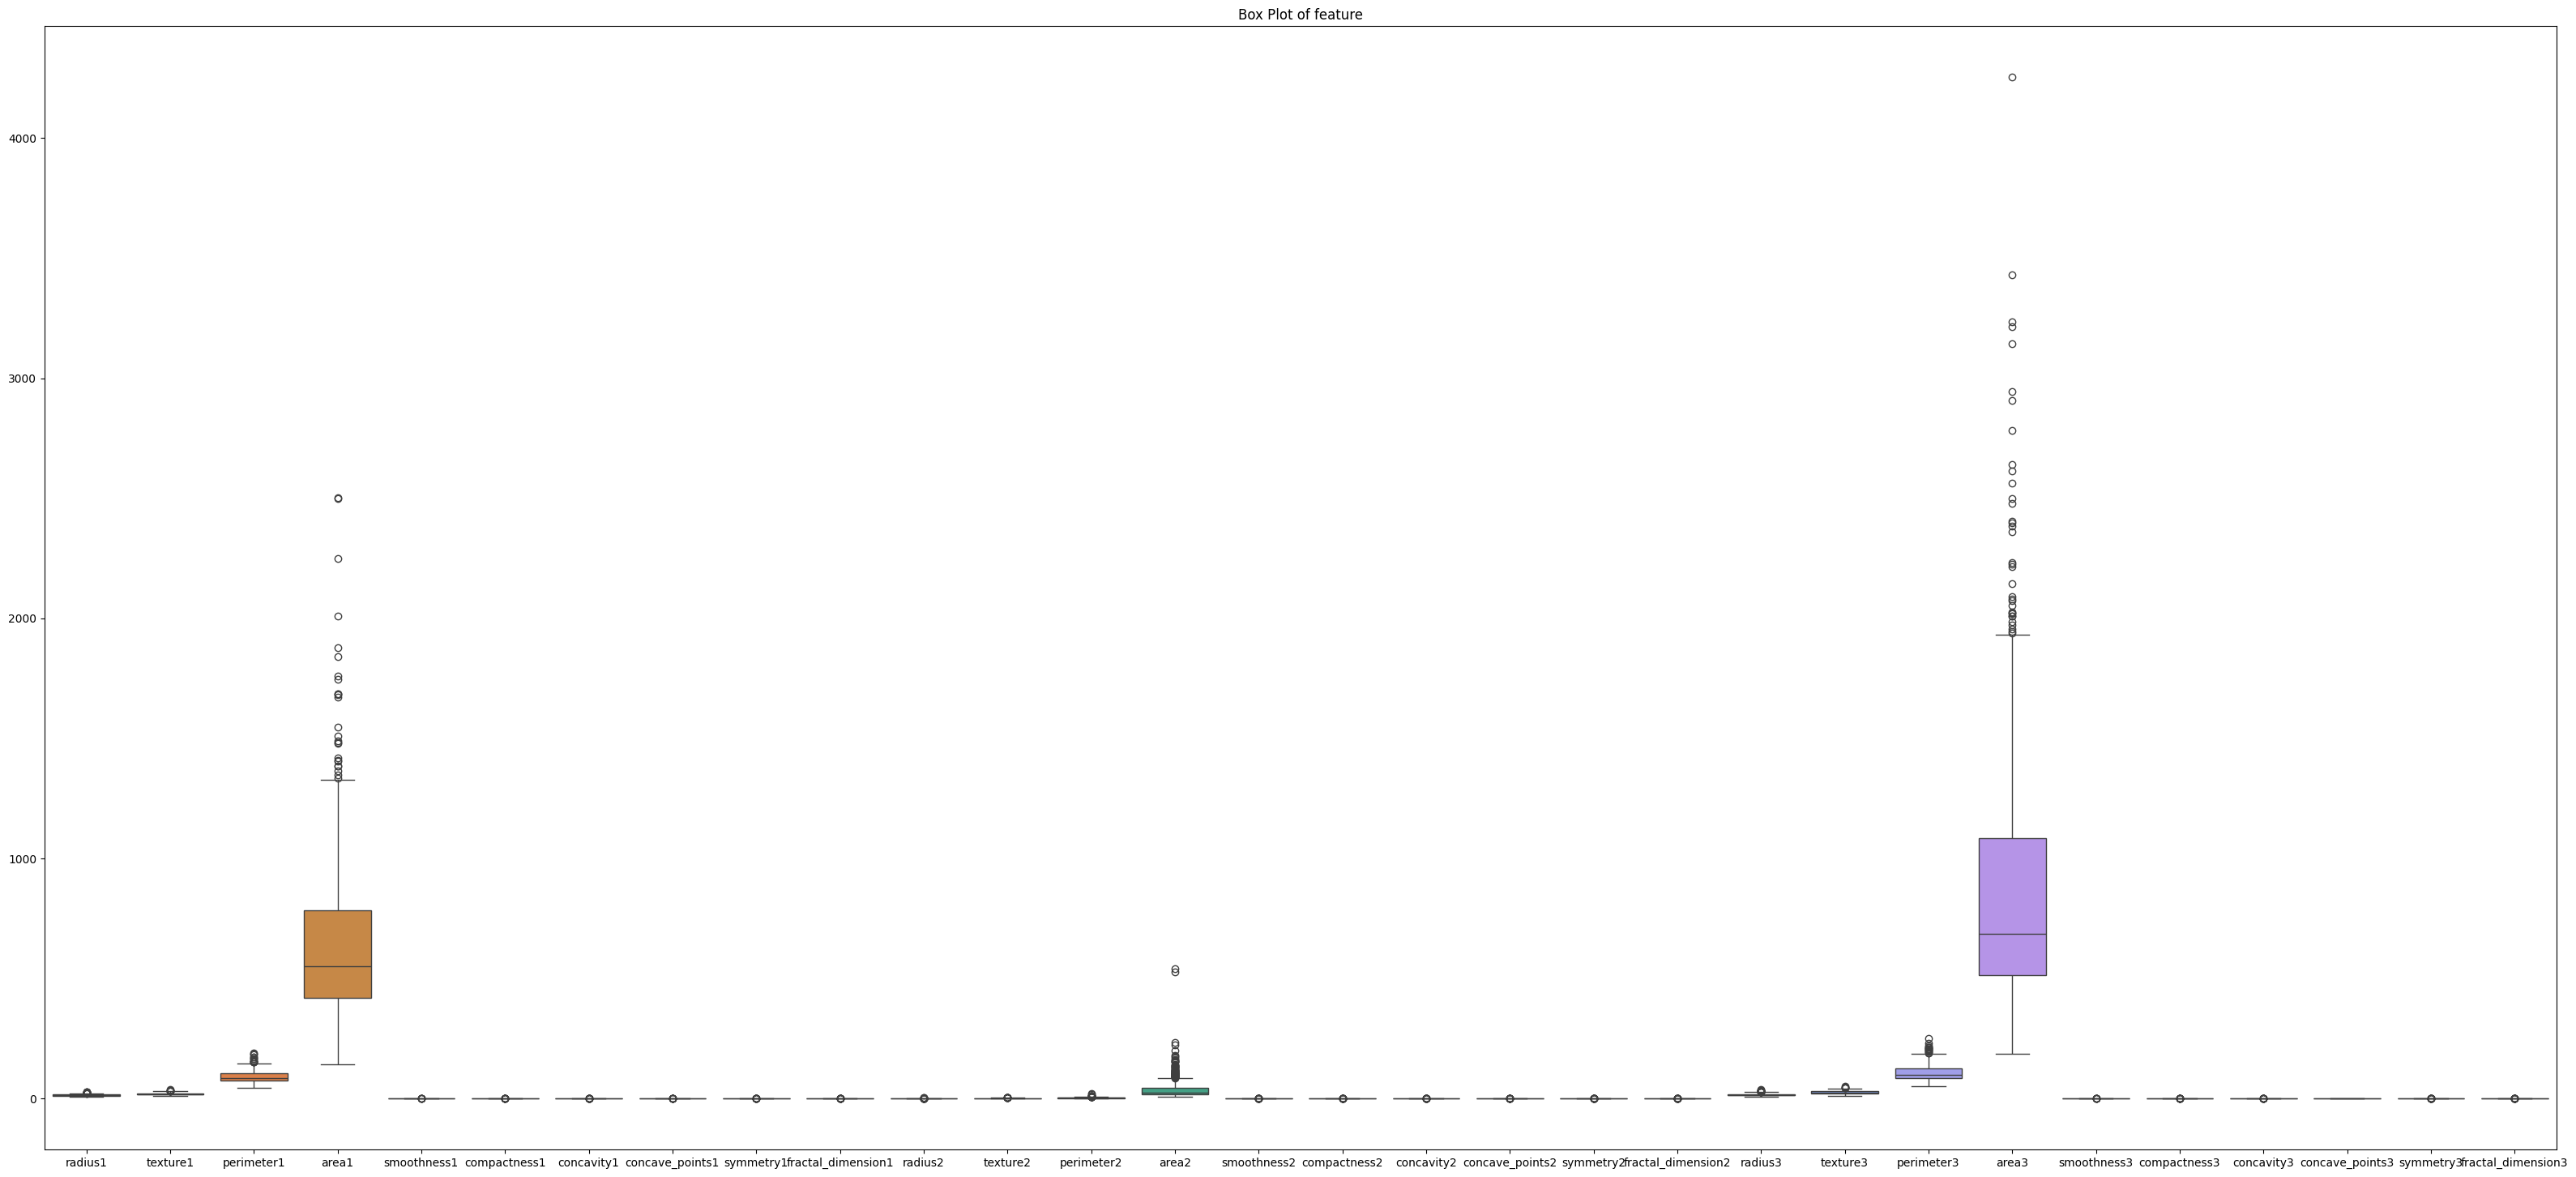

In [7]:
plt.figure(figsize=(40, 18))
sns.boxplot(df)
plt.title('Box Plot of feature')
plt.show()

In [8]:
# Checking the outlier counts
def outlier_count(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

cols = ['perimeter1', 'area1', 'area2', 'texture3', 'perimeter3', 'area3']
for col in cols:
    outlier_num = outlier_count(df, col)
    print(f"Number of outliers in {col}: {outlier_num}")

Number of outliers in perimeter1: 13
Number of outliers in area1: 25
Number of outliers in area2: 65
Number of outliers in texture3: 5
Number of outliers in perimeter3: 15
Number of outliers in area3: 35


In [9]:
#Capping the outliers to lower or upper bound
def cap_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

cols = ['perimeter1', 'area1', 'area2', 'texture3', 'perimeter3', 'area3']
for col in cols:
    df = cap_outliers(df, col)

In [10]:
#Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
if len(duplicate_rows)>0:
  print("Duplicate Rows :")
  print(duplicate_rows)
  #Remove duplicates
  df.drop_duplicates(inplace=True)
  print(f"Number of rows after removing duplicates: {len(df)}")

Number of duplicate rows: 0


In [11]:
df.Diagnosis.value_counts()

,count
Diagnosis,
B,357
M,212


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

## **Exploratory Data Analysis (EDA)**
### Visualizing data distributions and relationships between features to gain insights.
### Checking for correlations between features and the target variable.

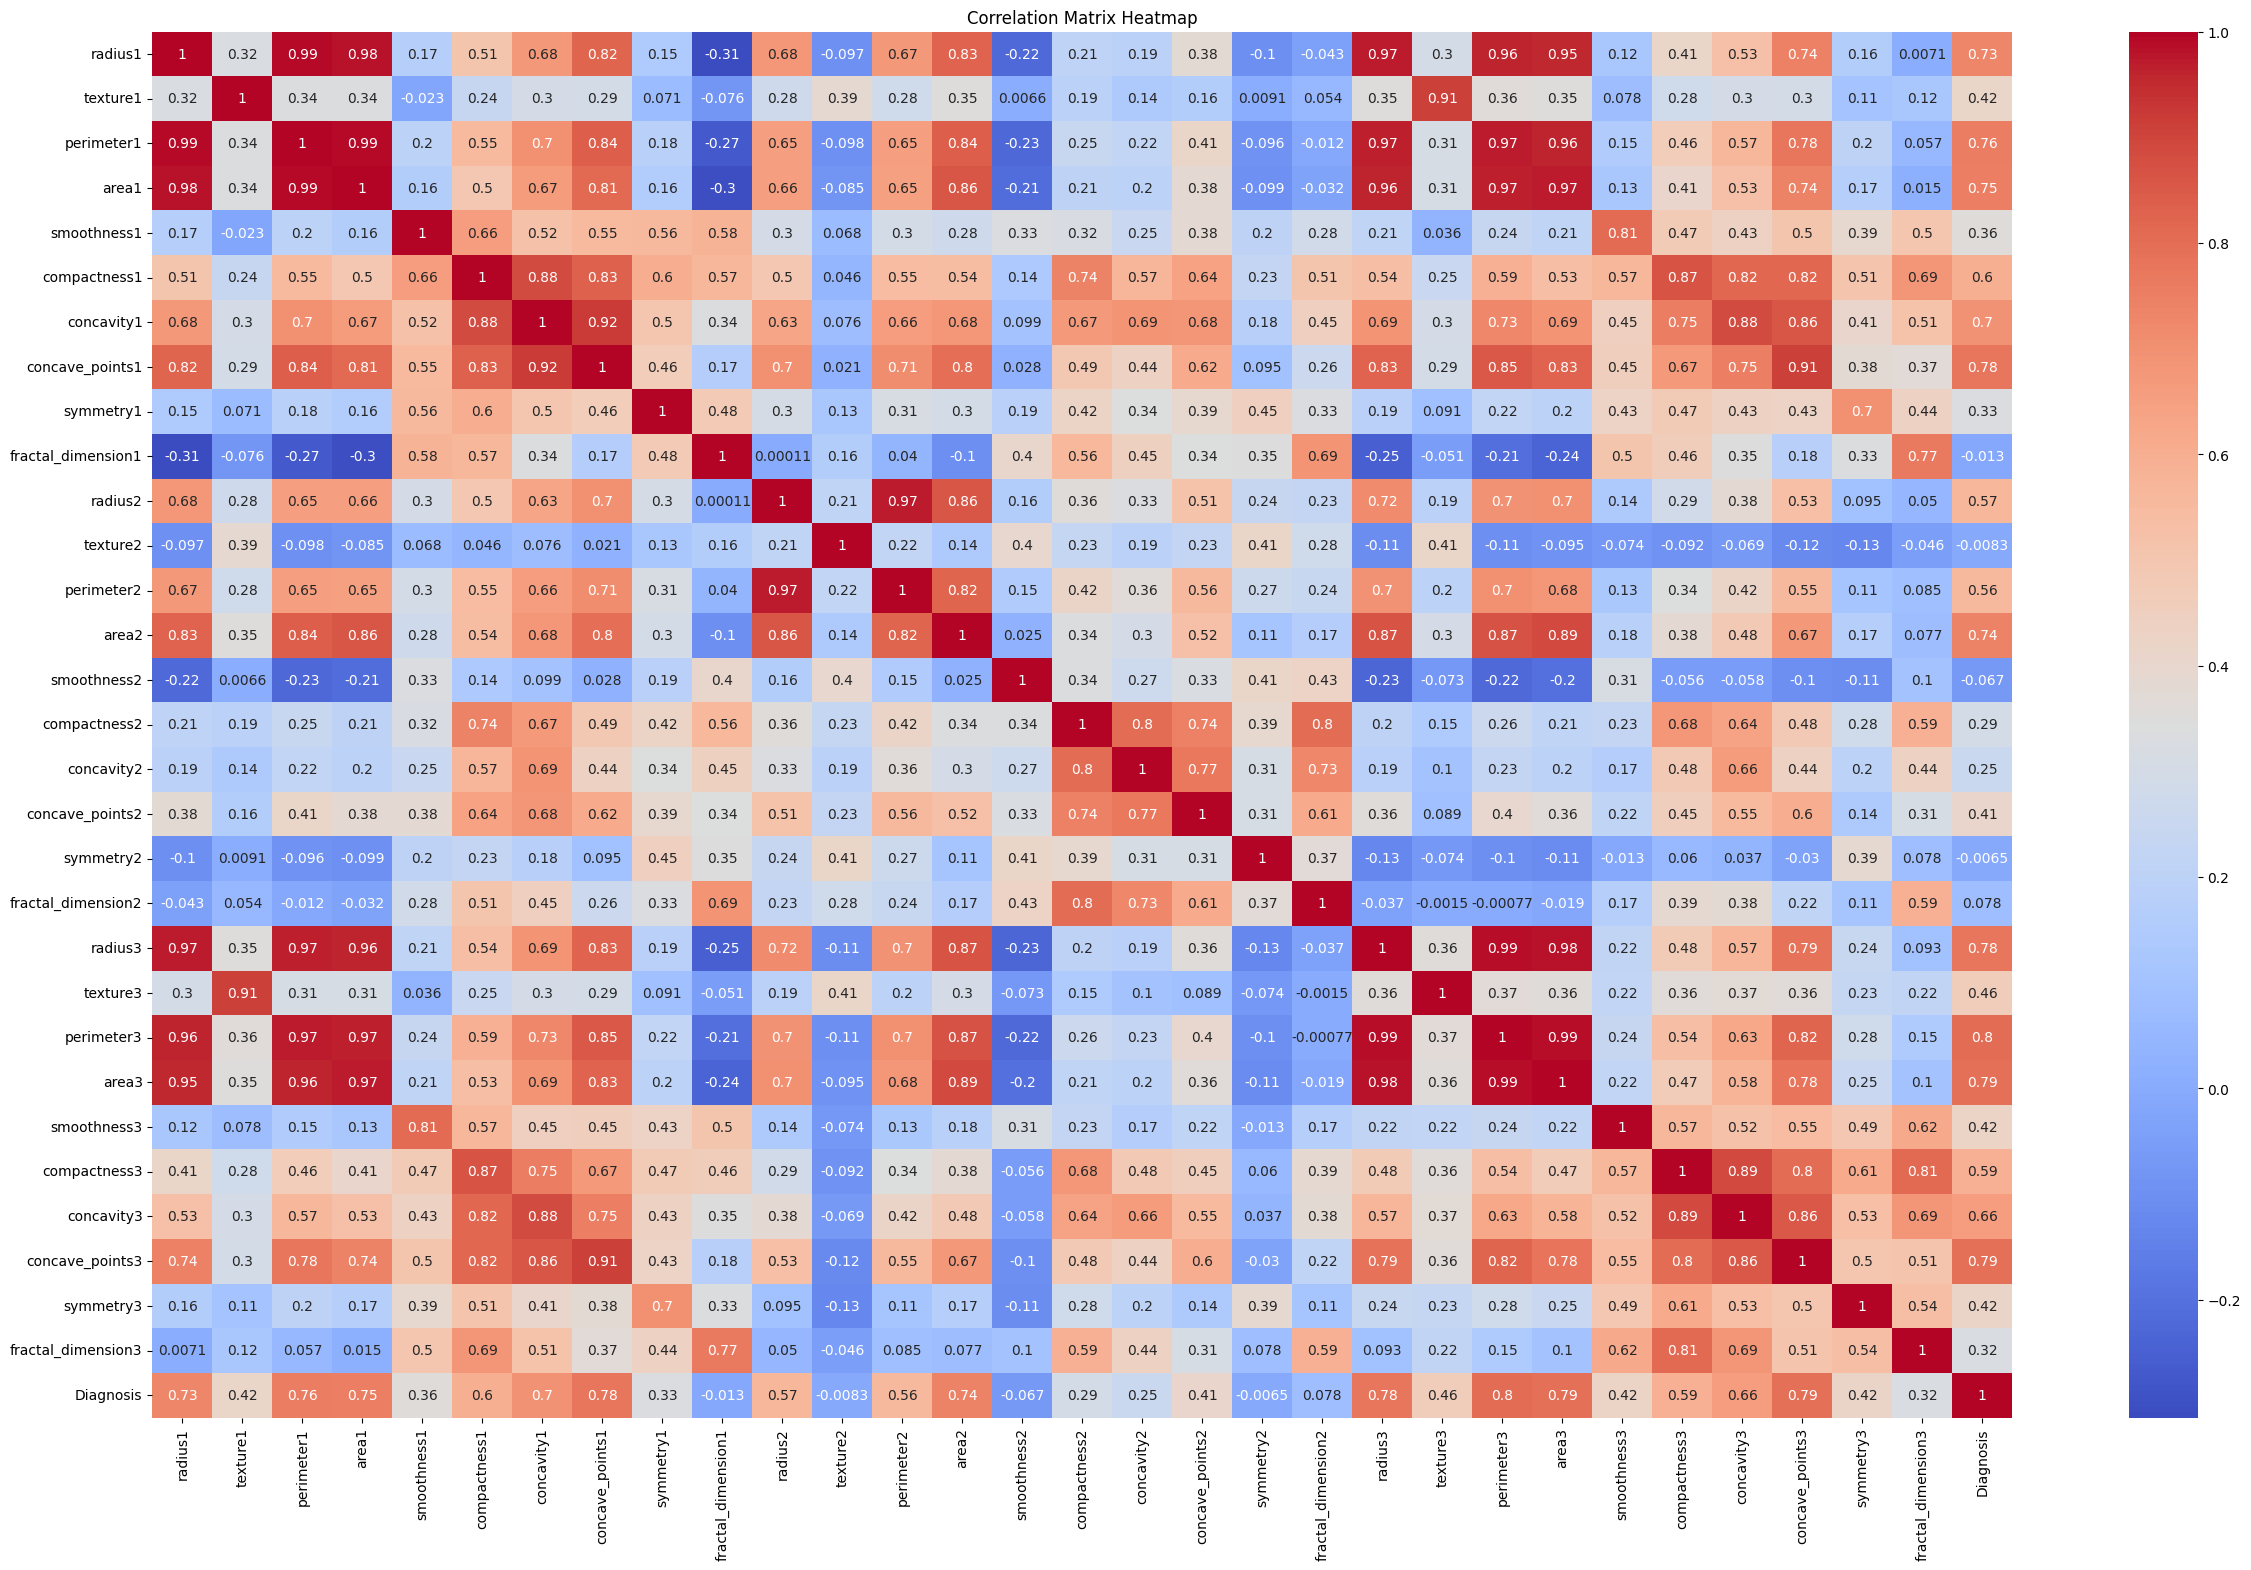

In [13]:
plt.figure(figsize=(30, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# Separating features and labels
X = df.drop(columns=['Diagnosis'])  # Drop target variable
y = df['Diagnosis']

## **Feature Engineering and Selection**
### Selecting relevant features using Recursive Feature Elimination (RFE) to improve model performance.

In [15]:
# #Feature Selection using Recursive Feature Elimination (RFE)
# rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
# rfe_selector.fit(X, y)

# selected_features = X.columns[rfe_selector.support_]
# print("Selected Features:", selected_features)

In [16]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

In [17]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.feature_selection import SelectFromModel

# Train the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X, y)

# Get feature importances as a Series
feature_importances = pd.Series(xgb.feature_importances_, index=X.columns)

# Select top 10 features
top_10_features = feature_importances.sort_values(ascending=False).head(10).index.tolist()
print("Top 10 Selected Features by XGBoost:", top_10_features)




Top 10 Selected Features by XGBoost: ['radius3', 'perimeter3', 'concave_points3', 'concave_points1', 'area3', 'texture3', 'concavity3', 'concave_points2', 'radius2', 'area1']


In [18]:
# Subset the data
X_selected = X[top_10_features]

## **Model Training and Evaluation**
### Training and evaluating different machine learning models to identify the best-performing one.
### Using cross-validation to assess model generalization ability.

In [19]:
# Splitting data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

In [20]:
# Initialize models with class_weight='balanced'
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced', probability=True, random_state=42)
}

In [21]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("-" * 30)



Training Logistic Regression...
Logistic Regression - Accuracy: 0.9790, Precision: 0.9811, Recall: 0.9630, F1 Score: 0.9720
------------------------------
Training Random Forest...
Random Forest - Accuracy: 0.9720, Precision: 0.9630, Recall: 0.9630, F1 Score: 0.9630
------------------------------
Training Decision Tree...
Decision Tree - Accuracy: 0.9441, Precision: 0.9107, Recall: 0.9444, F1 Score: 0.9273
------------------------------
Training SVC...
SVC - Accuracy: 0.9510, Precision: 0.9434, Recall: 0.9259, F1 Score: 0.9346
------------------------------


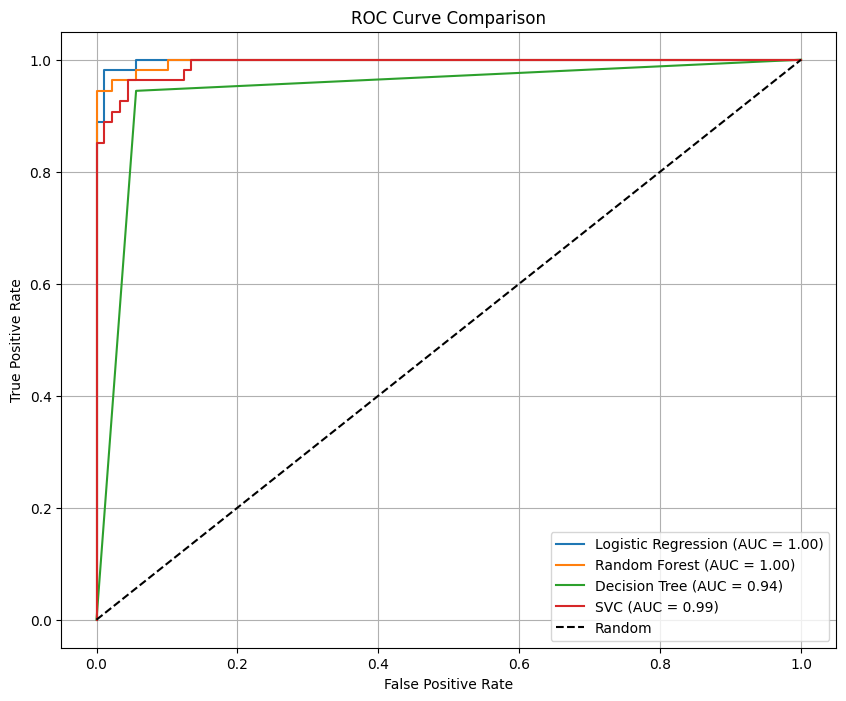

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Get probability scores (needed for ROC curve)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"): # For models like SVC
        y_proba = model.decision_function(X_test)
    else:
        # Skip models that don't provide probabilities or decision functions
        print(f"Skipping ROC curve for {name} (no predict_proba or decision_function)")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random') # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

 What ROC Curve Shows:
The ROC (Receiver Operating Characteristic) curve plots the True Positive Rate against the False Positive Rate.

A model that perfectly classifies all positives and negatives will have an AUC (Area Under Curve) of 1.0.

The closer the curve is to the top-left corner, the better the model.

The AUC score quantifies overall performance.

## **Model Deployment**
### Saving the best-performing model for future use.

In [23]:
# Saving the Logistic Regression model
best_model = models["Logistic Regression"]

# Create a pickle file for the model
filename = 'logistic_regression_Breast_Cancer_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))
print(f"Logistic Regression model saved to {filename}")

Logistic Regression model saved to logistic_regression_Breast_Cancer_model.pkl
